# Anomaly Detection
---

### Importing
---

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import highlighter as hl 
from datetime import timedelta

register_matplotlib_converters()
# pd.options.mode.chained_assignment = None

In [2]:
time_series = pd.read_csv("../data/formatted/admiralbulldog_4_30_mps.csv", 
                          index_col = "Unnamed: 0",
                          parse_dates = True).rename(columns = {"0": "mps"})

time_series.head()

,mps
2019-04-30 08:57:00,3
2019-04-30 08:57:01,1
2019-04-30 08:57:02,2
2019-04-30 08:57:03,3
2019-04-30 08:57:04,2


### Plotting
---

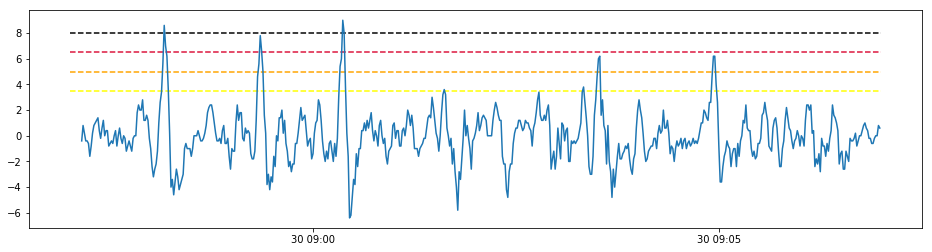

In [3]:
plt.figure(figsize = (16,4))
plt.plot(time_series.rolling(5).mean().diff(5)[:600])

plt.hlines(8, 
           time_series.index[0], 
           time_series.index[600], 
           colors = "k", 
           linestyles = "dashed")

plt.hlines(6.5, 
           time_series.index[0], 
           time_series.index[600], 
           colors = "crimson", 
           linestyles = "dashed")

plt.hlines(5, 
           time_series.index[0], 
           time_series.index[600], 
           colors = "orange", 
           linestyles = "dashed")

plt.hlines(3.5, 
           time_series.index[0], 
           time_series.index[600], 
           colors = "yellow", 
           linestyles = "dashed");

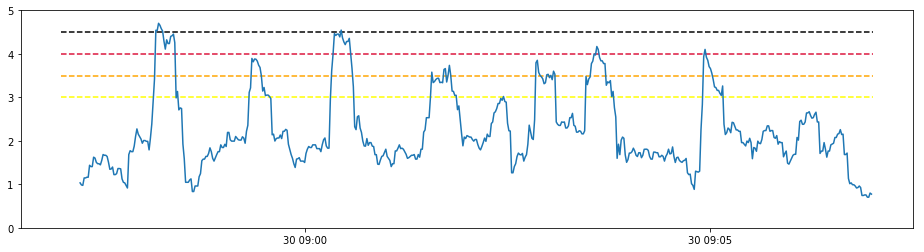

In [4]:
plt.figure(figsize = (16,4))
plt.plot(time_series["mps"].rolling(15).std()[:600])

plt.hlines(4.5, 
           time_series.index[0], 
           time_series.index[600], 
           colors = "k", 
           linestyles = "dashed")

plt.hlines(4, 
           time_series.index[0], 
           time_series.index[600], 
           colors = "crimson", 
           linestyles = "dashed")

plt.hlines(3.5, 
           time_series.index[0], 
           time_series.index[600], 
           colors = "orange", 
           linestyles = "dashed")

plt.hlines(3, 
           time_series.index[0], 
           time_series.index[600], 
           colors = "yellow", 
           linestyles = "dashed")

plt.yticks([0,1,2,3,4,5]);

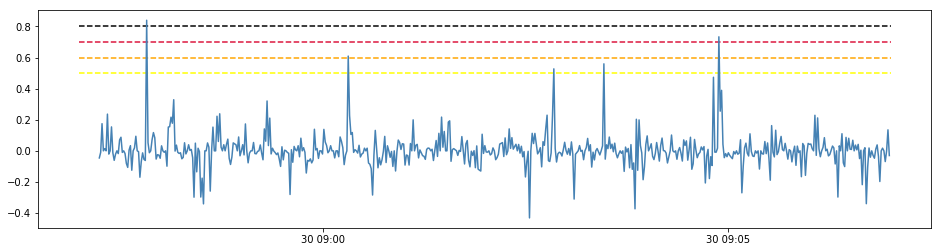

In [5]:
plt.figure(figsize = (16,4))
plt.plot(time_series["mps"].rolling(15).std().pct_change()[:600],
         c = "steelblue")

plt.hlines(0.8, 
           time_series.index[0], 
           time_series.index[600], 
           colors = "k", 
           linestyles = "dashed")

plt.hlines(0.7, 
           time_series.index[0], 
           time_series.index[600], 
           colors = "crimson", 
           linestyles = "dashed")

plt.hlines(0.6, 
           time_series.index[0], 
           time_series.index[600], 
           colors = "orange", 
           linestyles = "dashed")

plt.hlines(0.5, 
           time_series.index[0], 
           time_series.index[600], 
           colors = "yellow", 
           linestyles = "dashed");

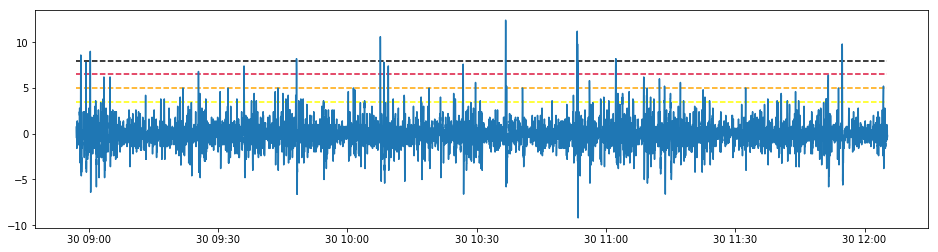

In [6]:
plt.figure(figsize = (16,4))
plt.plot(time_series.rolling(5).mean().diff(5))

plt.hlines(8, 
           time_series.index.min(), 
           time_series.index.max(), 
           colors = "k", 
           linestyles = "dashed")

plt.hlines(6.5, 
           time_series.index.min(), 
           time_series.index.max(), 
           colors = "crimson", 
           linestyles = "dashed")

plt.hlines(5, 
           time_series.index.min(), 
           time_series.index.max(), 
           colors = "orange", 
           linestyles = "dashed")

plt.hlines(3.5, 
           time_series.index.min(), 
           time_series.index.max(), 
           colors = "yellow", 
           linestyles = "dashed")

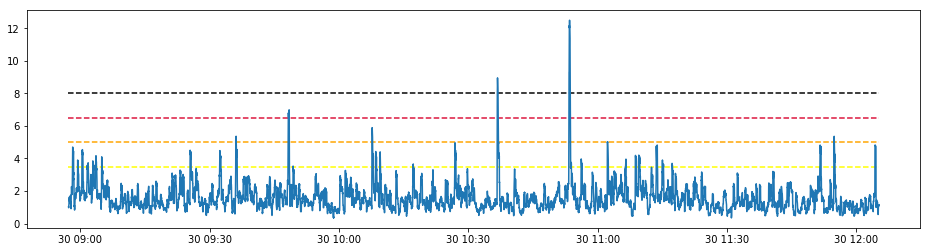

In [7]:
plt.figure(figsize = (16,4))
plt.plot(time_series["mps"].rolling(15).std())

plt.hlines(8, 
           time_series.index.min(), 
           time_series.index.max(), 
           colors = "k", 
           linestyles = "dashed")

plt.hlines(6.5, 
           time_series.index.min(), 
           time_series.index.max(), 
           colors = "crimson", 
           linestyles = "dashed")

plt.hlines(5, 
           time_series.index.min(), 
           time_series.index.max(), 
           colors = "orange", 
           linestyles = "dashed")

plt.hlines(3.5, 
           time_series.index.min(), 
           time_series.index.max(), 
           colors = "yellow", 
           linestyles = "dashed")

## Standard Deviation Anomaly Detection
---

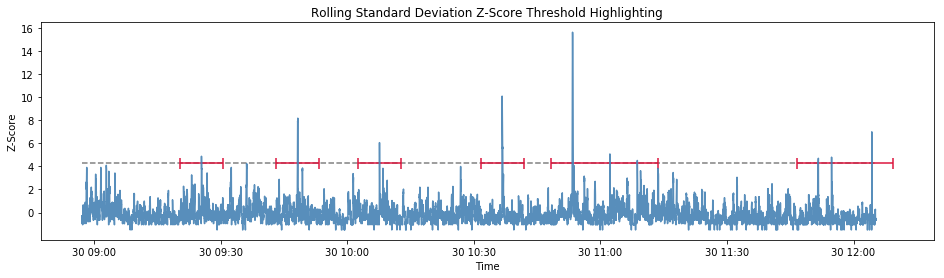

In [8]:
thresh = 4.25

time_series["highlight"] = hl.highlight_by_stdev(time_series, threshold = thresh)

stdev = time_series["mps"].rolling(5).std()
z_score = stdev - stdev.mean() / stdev.std()

plt.figure(figsize = (16,4))
plt.plot(z_score,
         c = "steelblue",
         alpha = 0.9)

plt.hlines(thresh, 
           time_series.index.min(), 
           time_series.index.max(), 
           colors = "k", 
           linestyles = "dashed",
           alpha = 0.5)

for clip in hl.get_highlights_timestamp(time_series, before_time = 300, after_time = 300):

    plt.hlines(thresh, 
               clip[0], 
               clip[1], 
               colors = "crimson")
    
    plt.vlines(clip[0], 
               thresh - 0.5, 
               thresh + 0.5, 
               colors = "crimson")
    
    plt.vlines(clip[1], 
               thresh - 0.5, 
               thresh + 0.5, 
               colors = "crimson")
    
plt.yticks(range(0, 17, 2))

plt.title("Rolling Standard Deviation Z-Score Threshold Highlighting")
plt.xlabel("Time")
plt.ylabel("Z-Score")
    
plt.savefig("../assets/images/zscore_threshold.png");

> This image shows the intuition behind this method of highlighting. As the threshold is lowered, more spikes are added to the amount of clips generated. Note that the length of the clips has been expanded for illustration.

In [9]:


time_series["highlight"] = hl.highlight_by_stdev(time_series, threshold = 4)

time_series.head()

,mps,highlight
2019-04-30 08:57:00,3,0
2019-04-30 08:57:01,1,0
2019-04-30 08:57:02,2,0
2019-04-30 08:57:03,3,0
2019-04-30 08:57:04,2,0


In [10]:
# Testing both methods of finding the start and end times.

hl.get_highlights_timestamp(time_series)

[(Timestamp('2019-04-30 09:02:37'), Timestamp('2019-04-30 09:03:07')),
 (Timestamp('2019-04-30 09:25:11'), Timestamp('2019-04-30 09:25:42')),
 (Timestamp('2019-04-30 09:35:53'), Timestamp('2019-04-30 09:36:26')),
 (Timestamp('2019-04-30 09:47:57'), Timestamp('2019-04-30 09:48:32')),
 (Timestamp('2019-04-30 10:07:23'), Timestamp('2019-04-30 10:07:54')),
 (Timestamp('2019-04-30 10:36:26'), Timestamp('2019-04-30 10:37:06')),
 (Timestamp('2019-04-30 10:53:04'), Timestamp('2019-04-30 10:53:57')),
 (Timestamp('2019-04-30 11:01:59'), Timestamp('2019-04-30 11:02:32')),
 (Timestamp('2019-04-30 11:08:30'), Timestamp('2019-04-30 11:09:01')),
 (Timestamp('2019-04-30 11:51:21'), Timestamp('2019-04-30 11:51:55')),
 (Timestamp('2019-04-30 11:54:33'), Timestamp('2019-04-30 11:55:03')),
 (Timestamp('2019-04-30 12:04:05'), Timestamp('2019-04-30 12:04:39'))]

In [11]:
hl.clip_stats(hl.get_highlights_timestamp(time_series))

12 distinct clips
6:55 total minutes of video


In [12]:
hl.get_highlights_index(time_series.reset_index(drop = True))

[(337, 367),
 (1691, 1722),
 (2333, 2366),
 (3057, 3092),
 (4223, 4254),
 (5966, 6006),
 (6964, 7017),
 (7499, 7532),
 (7890, 7921),
 (10461, 10495),
 (10653, 10683),
 (11225, 11259)]

In [13]:
hl.clip_stats(hl.get_highlights_index(time_series.reset_index(drop = True)))

12 distinct clips
6:55 total minutes of video


In [14]:
time_series.to_csv("../data/formatted/admiralbulldog_4_30_mps_zscore.csv")

In [15]:
# Getting the chat log for just one game from the stream.
# Game starts at 10:29am and ends at 11:13

game = time_series["2019-04-30 10:29:26":"2019-04-30 11:14:00"]

game.head()

,mps,highlight
2019-04-30 10:29:26,1,0
2019-04-30 10:29:27,0,0
2019-04-30 10:29:28,0,0
2019-04-30 10:29:29,0,0
2019-04-30 10:29:30,0,0


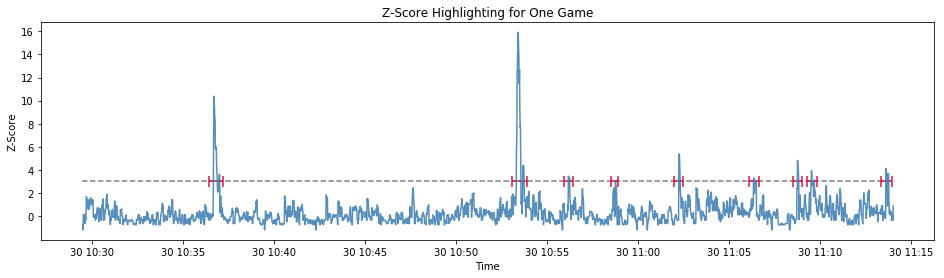

In [55]:
thresh = 3

game["highlight"] = hl.highlight_by_stdev(game, threshold = thresh)

stdev = game["mps"].rolling(5).std()
z_score = stdev - stdev.mean() / stdev.std()

plt.figure(figsize = (16,4))
plt.plot(z_score,
         c = "steelblue",
         alpha = 0.9)

plt.hlines(thresh, 
           game.index.min(), 
           game.index.max(), 
           colors = "k", 
           linestyles = "dashed",
           alpha = 0.5)

for clip in hl.get_highlights_timestamp(game, before_time = 15, after_time = 10):

    plt.hlines(thresh, 
               clip[0], 
               clip[1], 
               colors = "crimson")
    
    plt.vlines(clip[0], 
               thresh - 0.5, 
               thresh + 0.5, 
               colors = "crimson")
    
    plt.vlines(clip[1], 
               thresh - 0.5, 
               thresh + 0.5, 
               colors = "crimson")

plt.yticks(range(0, 17, 2))

plt.title("Z-Score Highlighting for One Game")
plt.xlabel("Time")
plt.ylabel("Z-Score");

plt.savefig("../assets/images/zscore_threshold_single_game.png");

In [17]:
game["highlight"] = hl.highlight_by_stdev(game, threshold = thresh)

hl.clip_stats(hl.get_highlights_index(game.reset_index(), 
                                      before_time = 15, 
                                      after_time = 10))

9 distinct clips
5:8 total minutes of video


/Users/derek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Markov Chain Anomaly Detection
---

### Reimporting
---

In [18]:
time_series = pd.read_csv("../data/formatted/admiralbulldog_4_30_mps.csv", 
                          index_col = "Unnamed: 0",
                          parse_dates = True).rename(columns = {"0": "mps"})

time_series.head()

,mps
2019-04-30 08:57:00,3
2019-04-30 08:57:01,1
2019-04-30 08:57:02,2
2019-04-30 08:57:03,3
2019-04-30 08:57:04,2


In [23]:
stdev = time_series["mps"].rolling(5).std()
z_score = stdev - stdev.mean() / stdev.std()

# z_score = time_series["mps"]

mu = z_score.mean()
sig = z_score.std()

mc_prob = []

for score in z_score:
    mc_prob.append(scipy.stats.norm(mu, sig).pdf(score))
    mu = score
    
mc_prob = pd.Series(mc_prob, index = time_series.index)

time_series["mc_prob"] = mc_prob

time_series.head(6)

,mps,mc_prob
2019-04-30 08:57:00,3,NaN
2019-04-30 08:57:01,1,NaN
2019-04-30 08:57:02,2,NaN
2019-04-30 08:57:03,3,NaN
2019-04-30 08:57:04,2,NaN
2019-04-30 08:57:05,0,0.395847


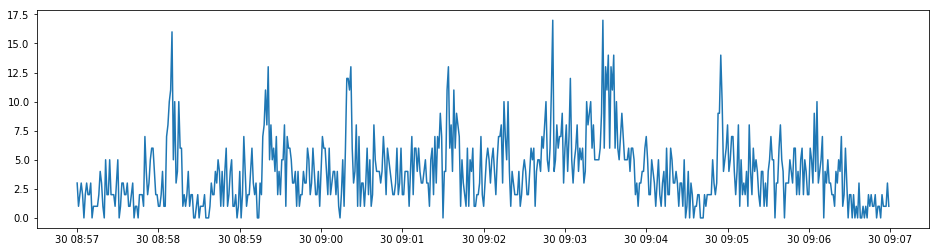

In [24]:
start = 0
plt.figure(figsize = (16,4))
plt.plot(time_series["mps"][start:start + 600]);

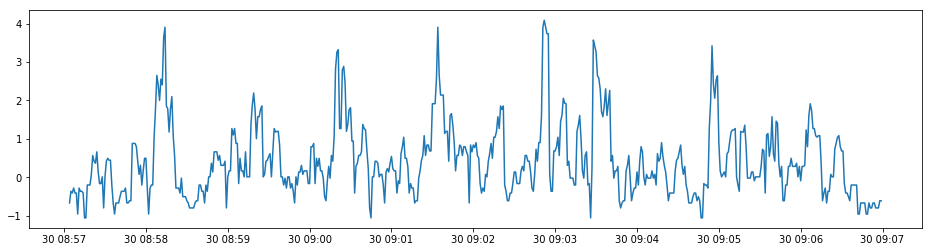

In [25]:
plt.figure(figsize = (16,4))
plt.plot(z_score[start:start + 600]);

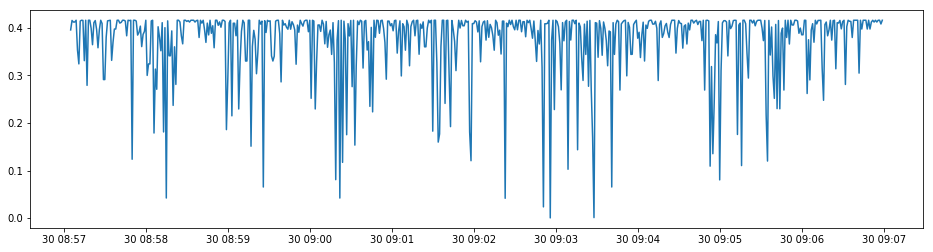

In [26]:
# markov pdf, scaled
# first ten minutes

plt.figure(figsize = (16,4))
plt.plot(time_series["mc_prob"][start:start + 600]);

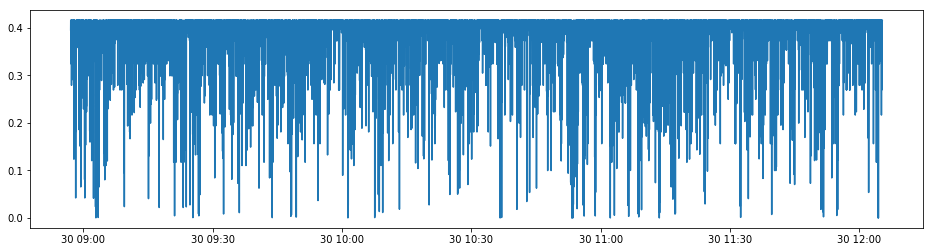

In [27]:
# markov pdf, scaled
# whole data frame

plt.figure(figsize = (16,4))
plt.plot(time_series["mc_prob"])#[start:start + 600]);

Text(0, 0.5, 'Probability')

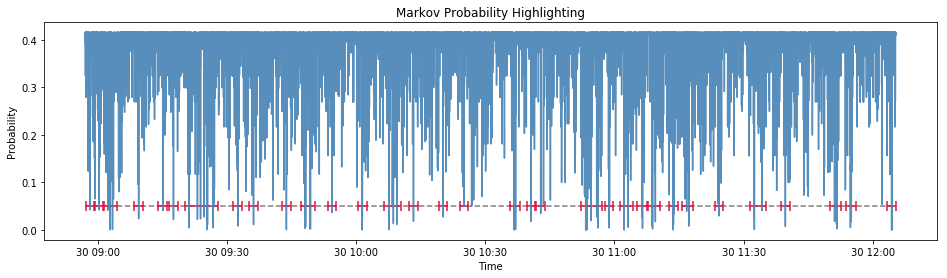

In [30]:
thresh = 0.05



stdev = time_series["mps"].rolling(5).std()
z_score = stdev - stdev.mean() / stdev.std()

mu = z_score.mean()
sig = z_score.std()

mc_prob = []

for score in z_score:
    mc_prob.append(scipy.stats.norm(mu, sig).pdf(score))
    mu = score
    
mc_prob = pd.Series(mc_prob, index = time_series.index)

time_series["mc_prob"] = mc_prob

time_series["highlight"] = (time_series["mc_prob"] <= thresh).astype(int)



plt.figure(figsize = (16,4))
plt.plot(time_series["mc_prob"],
         c = "steelblue",
         alpha = 0.9)

plt.hlines(thresh, 
           time_series.index.min(), 
           time_series.index.max(), 
           colors = "k", 
           linestyles = "dashed",
           alpha = 0.5)

for clip in hl.get_highlights_timestamp(time_series, before_time = 60, after_time = 60):

    plt.hlines(thresh, 
               clip[0], 
               clip[1], 
               colors = "crimson")

    plt.vlines(clip[0], 
               thresh - 0.01, 
               thresh + 0.01, 
               colors = "crimson")

    plt.vlines(clip[1], 
               thresh - 0.01, 
               thresh + 0.01, 
               colors = "crimson")

plt.title("Markov Probability Highlighting")
plt.xlabel("Time")
plt.ylabel("Probability");

In [28]:
time_series["highlight"] = hl.highlight_by_probability(time_series)

time_series.head()

,mps,mc_prob,highlight
2019-04-30 08:57:00,3,NaN,0
2019-04-30 08:57:01,1,NaN,0
2019-04-30 08:57:02,2,NaN,0
2019-04-30 08:57:03,3,NaN,0
2019-04-30 08:57:04,2,NaN,0


In [29]:
hl.clip_stats(hl.get_highlights_timestamp(time_series))

47 distinct clips
28:9 total minutes of video


In [37]:
# Getting the chat log for just one game from the stream.
# Game starts at 10:29am and ends at 11:13

time_series = pd.read_csv("../data/formatted/admiralbulldog_4_30_mps.csv", 
                          index_col = "Unnamed: 0",
                          parse_dates = True).rename(columns = {"0": "mps"})

game = time_series["2019-04-30 10:29:26":"2019-04-30 11:14:00"]

game.head()

,mps
2019-04-30 10:29:26,1
2019-04-30 10:29:27,0
2019-04-30 10:29:28,0
2019-04-30 10:29:29,0
2019-04-30 10:29:30,0


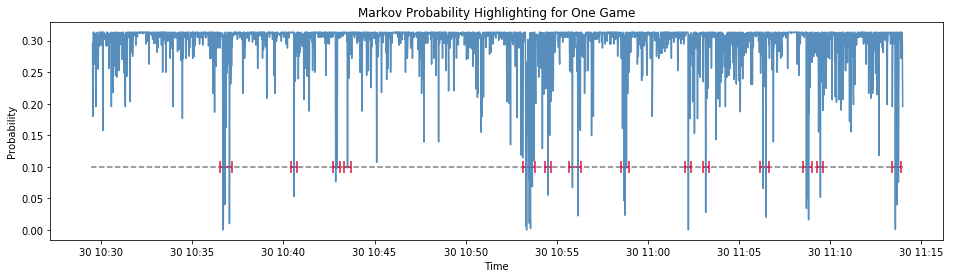

In [56]:
thresh = 0.1

stdev = game["mps"].rolling(5).std()
z_score = stdev - stdev.mean() / stdev.std()

mu = z_score.mean()
sig = z_score.std()

mc_prob = []

for score in z_score:
    mc_prob.append(scipy.stats.norm(mu, sig).pdf(score))
    mu = score
    
mc_prob = pd.Series(mc_prob, index = game.index)

game["mc_prob"] = mc_prob

game["highlight"] = (game["mc_prob"] <= thresh).astype(int)



plt.figure(figsize = (16,4))
plt.plot(game["mc_prob"],
         c = "steelblue",
         alpha = 0.9)

plt.hlines(thresh, 
           game.index.min(), 
           game.index.max(), 
           colors = "k", 
           linestyles = "dashed",
           alpha = 0.5)

for clip in hl.get_highlights_timestamp(game, before_time = 10, after_time = 10):

    plt.hlines(thresh, 
               clip[0], 
               clip[1], 
               colors = "crimson")

    plt.vlines(clip[0], 
               thresh - 0.01, 
               thresh + 0.01, 
               colors = "crimson")

    plt.vlines(clip[1], 
               thresh - 0.01, 
               thresh + 0.01, 
               colors = "crimson")



plt.title("Markov Probability Highlighting for One Game")
plt.xlabel("Time")
plt.ylabel("Probability");

plt.savefig("../assets/images/markov_probability_single_game.png");

In [39]:
hl.clip_stats(hl.get_highlights_timestamp(game))

14 distinct clips
8:40 total minutes of video


In [50]:
game["highlight"] = hl.highlight_by_probability(game, sensitivity = 0.1)

hl.clip_stats(hl.get_highlights_index(game.reset_index(), 
                                      before_time = 10, 
                                      after_time = 10))

14 distinct clips
6:20 total minutes of video


/Users/derek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Latent Dirichlet Allocation Anomaly Detection
---